In [36]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 1.7 MB 51.2 MB/s 
     |████████████████████████████████| 5.9 MB 54.8 MB/s 
     |████████████████████████████████| 438 kB 64.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [37]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [38]:
## import some basics libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [39]:
# Reading the dataset\

dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
## Divide the dataset into independent and dependent feature

X=dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]

In [41]:
## Feature Engineering

geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [42]:
## Concatenate these variable with dataframe

X.drop(columns=['Geography','Gender'],inplace=True)
X=pd.concat([X,geography,gender],axis=1)

In [43]:
## Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [45]:
X_train.shape,X_test.shape

((8000, 11), (2000, 11))

In [46]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [47]:
## lets initilize the ann

classifier=Sequential()

In [48]:
## Adding the input layer

classifier.add(Dense(units=11,activation='relu'))

In [49]:
## Adding the first hidden layer

classifier.add(Dense(units=7,activation='relu'))

In [50]:
## Adding the second hidden layer

classifier.add(Dense(units=6,activation='relu'))

In [51]:
## Adding the output layer

classifier.add(Dense(1,activation='sigmoid'))

In [52]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
# By default adam has learning rate
# if you want to specify then..

import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [19]:
model_histroy=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10000)

Epoch 1/10000
536/536 [==============================] - 7s 5ms/step - loss: 0.4985 - accuracy: 0.7820 - val_loss: 0.4606 - val_accuracy: 0.7970
Epoch 2/10000
536/536 [==============================] - 2s 4ms/step - loss: 0.4372 - accuracy: 0.8000 - val_loss: 0.4389 - val_accuracy: 0.8020
Epoch 3/10000
536/536 [==============================] - 2s 4ms/step - loss: 0.4164 - accuracy: 0.8127 - val_loss: 0.4204 - val_accuracy: 0.8114
Epoch 4/10000
536/536 [==============================] - 2s 4ms/step - loss: 0.3959 - accuracy: 0.8276 - val_loss: 0.3981 - val_accuracy: 0.8224
Epoch 5/10000
536/536 [==============================] - 2s 4ms/step - loss: 0.3728 - accuracy: 0.8419 - val_loss: 0.3832 - val_accuracy: 0.8353
Epoch 6/10000
536/536 [==============================] - 2s 4ms/step - loss: 0.3581 - accuracy: 0.8509 - val_loss: 0.3733 - val_accuracy: 0.8391
Epoch 7/10000
536/536 [==============================] - 2s 4ms/step - loss: 0.3516 - accuracy: 0.8530 - val_loss: 0.3696 - val_ac

KeyboardInterrupt: ignored

In [23]:
# In above after certain epoch the accuracy is not going to increase so it is a waste to run for 1000 epoch 
# instead here Early Stopping is used....it will stop the iteration when the accuracy is not increasing

In [54]:
## Early Stopping

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [55]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4985 - accuracy: 0.7953 - val_loss: 0.4467 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4299 - accuracy: 0.7975 - val_loss: 0.4300 - val_accuracy: 0.7970
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4132 - accuracy: 0.8020 - val_loss: 0.4151 - val_accuracy: 0.8012
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3926 - accuracy: 0.8121 - val_loss: 0.3970 - val_accuracy: 0.8095
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3740 - accuracy: 0.8222 - val_loss: 0.3865 - val_accuracy: 0.8311
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3637 - accuracy: 0.8464 - val_loss: 0.3804 - val_accuracy: 0.8455
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3577 - accuracy: 0.8502 - val_loss: 0.3782 - val_accuracy:

In [56]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

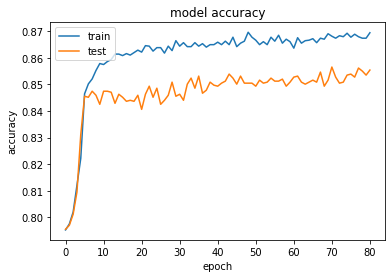

In [57]:
## plotting history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

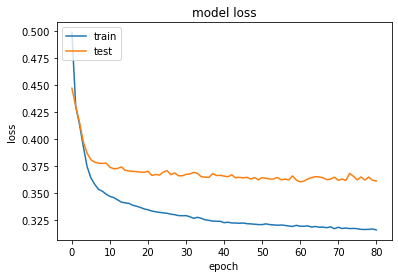

In [58]:
## plotting history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [59]:
## Making the prediction

y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [61]:
## Making the confusion matrix

from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[1522,   73],
       [ 210,  195]])